В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=true).

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

In [1]:
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
plt.rcParams['font.size'] = 15.0
sns.set(font_scale=1.5, font='monospace')
plt.rcParams['figure.figsize'] = (15, 6)

В качестве исходного распределения возьмем распределение Лапласа:
$$pdf_{L}(x) = \frac{1}{2} exp (-abs(x)) $$

In [2]:
poiss = sts.poisson(3)

In [5]:
1 - poiss.pmf(4)

0.83196864425845918

In [221]:
distr = sts.laplace()
DISTR_MEAN = 0
DISTR_STD = np.sqrt(2.)

In [225]:
def plot_distribution(xs, ys, label):
    """
    Функция для отрисовки графика y(x) с меткой label.
    """
    plt.plot(xs, ys, label=label, linewidth=3.)
    plt.xlabel("$x$")
    plt.legend()

In [226]:
xs = np.arange(-5, 5, 0.01)
ys_cdf = distr.cdf(xs)
ys_pdf = distr.pdf(xs)

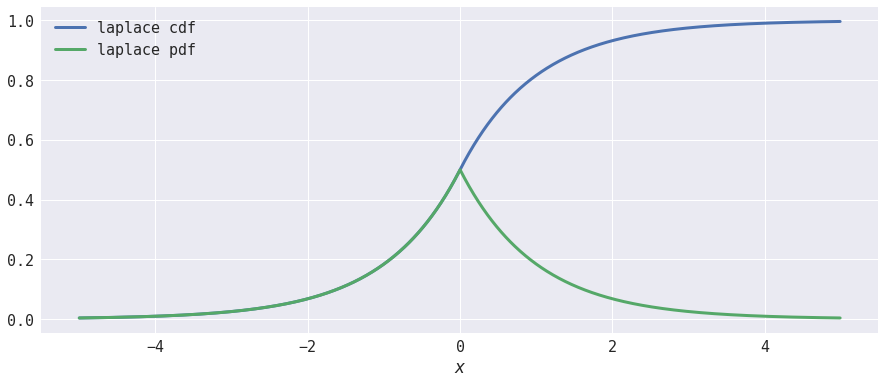

In [227]:
plot_distribution(xs, ys_cdf, 'laplace cdf')
plot_distribution(xs, ys_pdf, 'laplace pdf')

In [230]:
def generate_n_samples(distribution, num, n):
    """
    Функция для генерирования num выборок длины n из данного распределения.
    """
    samples = [distribution.rvs(n) for i in xrange(num)]
    return samples

In [231]:
def plot_histogram_of_means(samples, label):
    """
    Функция для отрисовки гистограммы выборочных средних по набору выборок samples.
    """
    means = [s.mean() for s in samples]
    plt.hist(means, normed=True, label=label, alpha=0.8, color='g')
    plt.legend()
    return means

In [232]:
def calc_approximate_normal_distribution(samples):
    """
    Функция для вычисления теоретических значений параметров нормального распределения, описывающего поведение
    выборочного среднего для данного набора выборок samples.
    """
    n = len(samples[0])
    mean = DISTR_MEAN
    std = DISTR_STD / np.sqrt(n)
    return mean, std

In [235]:
def plot_normal_pdf(mean, std, xs):
    """
    Функция для отрисовки плотности нормального распределения с заданными параметрами.
    """
    normal = sts.norm(loc=mean, scale=std)
    plt.plot(xs, normal.pdf(xs), label="normal pdf with $\mu = %.2f$, $\sigma = %.3f$" % (mean, std), linewidth=3., color='r')
    plt.xlabel('$x$')
    plt.legend()

In [263]:
def plot_kde(values, xs):
    """
    Функция для отрисовки эмпирической плотности, вычисленной при помощи ядра Гаусса.
    """
    pdf = sts.gaussian_kde(values).evaluate(xs)
    plt.plot(xs, pdf, label='KDE', linewidth=3., color='y')
    plt.legend()

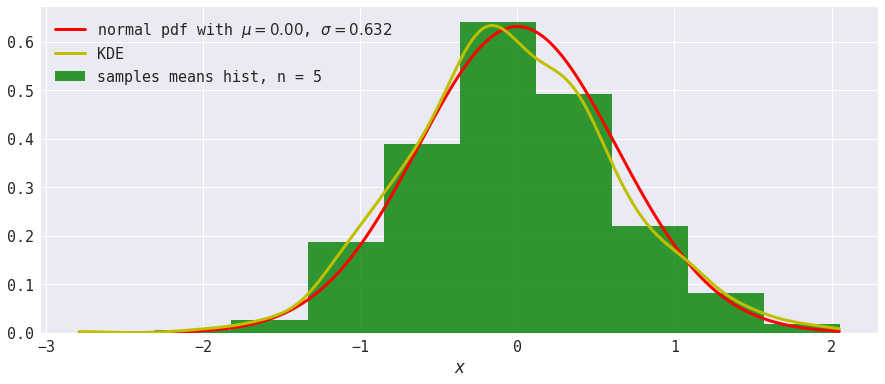

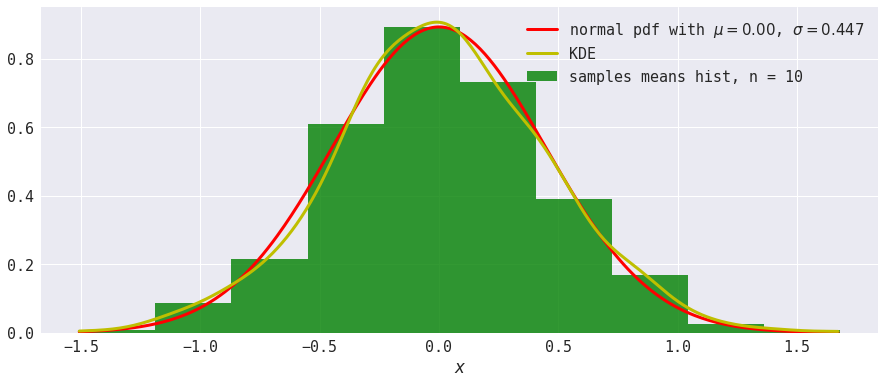

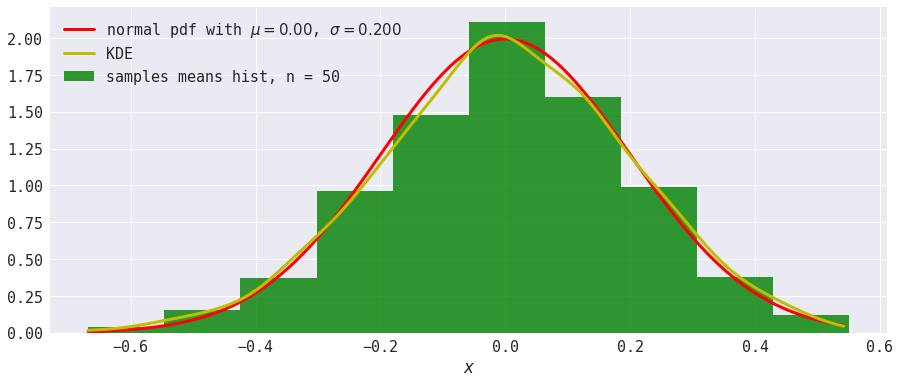

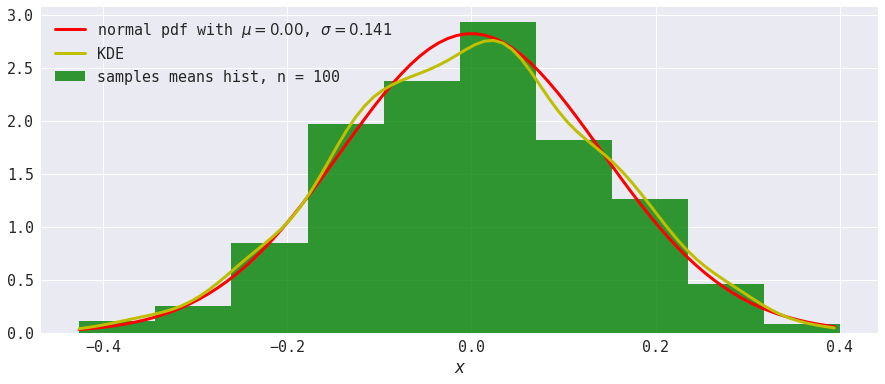

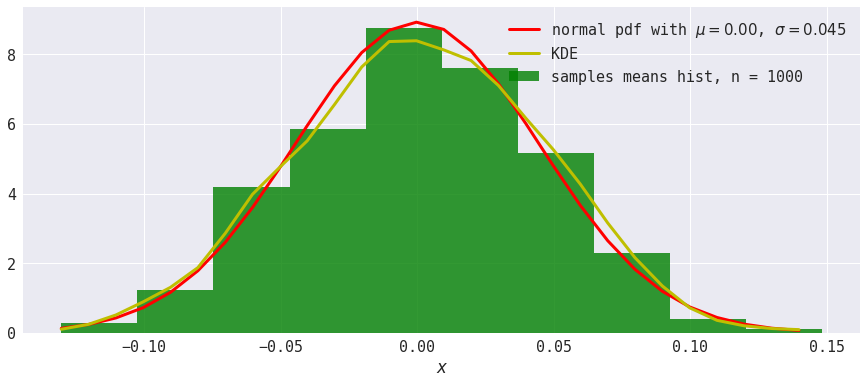

In [262]:
for n in [5, 10, 50, 100, 1000]:
    
    samples = generate_n_samples(distr, 1000, n)
    
    mean, std = calc_approximate_normal_distribution(samples)
    
    means = plot_histogram_of_means(samples, "samples means hist, n = %s" % n)
    
    xs = np.arange(min(means), max(means), 0.01)
    plot_normal_pdf(mean, std, xs)
    
    plot_kde(means, xs)
    
    plt.show()

Как хорошо видно, при увеличении длины одной выборки распределение выборочных средних (по набору из 1000 выборок) все лучше описывается нормальным распределением. При этом, даже при размере выборки = 5 соответствие ("качество аппроксимации") довольно неплохое. Это обусловлено тем, что само распределение Лапласа "хорошее": симметричное и с небольшим разбросом значений вокруг среднего.